# AI - Everymind

## Participantes
- Felipe Leão
- Igor Garcia
- Marcelo Feitoza
- Michel Mansur
- Vinicius Fernandes
- Rodrigo Campos

In [ ]:
! pip install pycaret[full]
! pip install numba --upgrade
! pip install matplotlib==3.1.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 25.0 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 636 kB 49.3 MB/s 
     |████████████████████████████████| 1.7 MB 41.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 137 kB 38.1 MB/s 
     |████████████████████████████████| 3.3 MB 39.7 MB/s 
     |████████████████████████████████| 10.4 MB 29.0 MB/s 
     |████████████████████████████████| 167 kB 11.1 MB/s 
     |████████████████████████████████| 2.0 MB 40.4 MB/s 
     |████████████████████████████████| 25.9 MB 1.6 MB/s 
     |████████████████████████████████| 6.8 MB 48.6 MB/s 
     |████████████████████████████████| 88 kB 8.0 MB/s 
     |████████████████████████████████|

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 29.3 MB/s 
     |████████████████████████████████| 34.6 MB 115 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 110 kB/s 
  Attempting uninstall: matplotlib
    Found existing 

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib
import sklearn

from pycaret.utils import enable_colab
enable_colab()

drive = drive.mount('/content/drive/')

Colab mode enabled.
Mounted at /content/drive/


##Primeiros comandos
Acesso aos dados da planinha Everymind

---

*   Limpeza e remoção de algumas colunas que não vão ser necessárias na amplitude do nosso modelo
*   Troca dos valores nulo para zero e sua ordenação
*   Definição das variáveis "base", como a tabela Everymind da spreadsheet, e "reconhecimento", como a tabela Reconhecimento.

##Este código cria 4 novas colunas na tabela Everymind.


---


- Essas tabelas se referem ao hot encoding no qual será inserido o tempo (intervalos de 3, 6, 9 e 12 meses) para promoção ou reconhecimento dentro da empresa.

In [ ]:
base = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Everymind")
reconhecimento = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Reconhecimento")
ambiente = pd.read_excel("/content/drive/Shareddrives/grupo5_modulo3/Everymind | Grupo 5.xlsx", "Ambiente de Trabalho 27.07")

base[base["Tipo Saida"].notna().sort_values()]
base = base.drop(['Nome Completo'], axis=1)
base = base.drop(['Etnia'], axis=1)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [ ]:
# reconhecimento

## Definição de Novas Tabelas

---

Criação da tabela Tempo de casa, que marca em dias quanto tempo a pessoa teve de empresa - para aquelas que têm data de saída, caso não, 0.

In [ ]:
import datetime

base['Dt Admissao'] = pd.to_datetime(base['Dt Admissao'])

houseTime = []
colaboratorStatus = []

for ind in base.index:
  if not pd.isnull(base['Dt Saida'][ind]):
    houseTime.append(
      pd.Timedelta(pd.to_datetime('today') - pd.to_datetime(base["Dt Admissao"][ind])).days
    )
  else:
    houseTime.append(
      pd.Timedelta(pd.to_datetime('today') - pd.to_datetime(base["Dt Admissao"][ind])).days
    )

for i in base.index:
  if pd.isnull(base['Dt Saida'][i]):
    colaboratorStatus.append(1) # Nao saiu
  else:
    colaboratorStatus.append(0) # Saiu
  
base['Tempo de casa (dias)'], base['Situacao'] = houseTime, colaboratorStatus
base['Tempo de casa (dias)']

0      2793
1      2741
2      2731
3      2582
4      2485
       ... 
470      70
471      70
472      70
473      70
474      70
Name: Tempo de casa (dias), Length: 475, dtype: int64

In [ ]:
base.replace('(^\s+|\s+$)', '', regex=True, inplace=True)

## Hot / Label Encoding 

In [ ]:
from sklearn import preprocessing

basePyCaret = pd.get_dummies(base, columns=['Genero', 'Escolaridade ', 'Estado Civil', 'Area', 'Estado', 'Cargo'])
basePyCaret.drop(['Matricula', 'Dt Nascimento', 'Dt Admissao', 'Dt Saida', 'Tipo Saida', 'Cidade'], axis=1, inplace=True)

basePyCaret.columns

Index(['Salario Mês', 'Idade', 'Tempo de casa (dias)', 'Situacao',
       'Genero_Feminino', 'Genero_Masculino', 'Escolaridade _Ensino Médio',
       'Escolaridade _Ensino Médio Incompleto', 'Escolaridade _Graduação',
       'Escolaridade _Mestrado', 'Escolaridade _Pós Graduação',
       'Escolaridade _Superior incompleto', 'Escolaridade _Técnico',
       'Estado Civil_Casado', 'Estado Civil_Divorciado',
       'Estado Civil_Separado', 'Estado Civil_Solteiro',
       'Estado Civil_União Estável', 'Area_AMS', 'Area_Agencia Digital',
       'Area_Analytics', 'Area_BAC', 'Area_BPM', 'Area_Best Minds',
       'Area_CPG & Retail', 'Area_Commerce', 'Area_Core & Industrias',
       'Area_Diretoria', 'Area_Education', 'Area_Financeiro',
       'Area_Infraestrutura', 'Area_Integration', 'Area_Mkt Cloud', 'Area_PS',
       'Area_People', 'Area_Produtos', 'Area_Vendas', 'Estado_BA', 'Estado_CE',
       'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG', 'Estado_MS',
       'Estado_PA', 'Estado_PB

In [ ]:
# basePyCaret
# basePyCaret['Salario Mês'] = (basePyCaret['Salario Mês'] - basePyCaret['Salario Mês'].mean()) / basePyCaret['Salario Mês'].std()
# basePyCaret['Salario Mês']

In [ ]:
basePyCaret['Salario Mês']

0      9914.4
1      8250.0
2      9914.4
3      7000.0
4      2750.0
        ...  
470    1500.0
471    7000.0
472    1750.0
473    2750.0
474    5500.0
Name: Salario Mês, Length: 475, dtype: float64

In [ ]:
# import pandas as pd
# from sklearn import preprocessing

# scaler = preprocessing.MinMaxScaler()
 
# basePyCaret = pd.DataFrame(scaler.fit_transform(basePyCaret))
# basePyCaret

In [ ]:
basePyCaret.columns

Index(['Salario Mês', 'Idade', 'Tempo de casa (dias)', 'Situacao',
       'Genero_Feminino', 'Genero_Masculino', 'Escolaridade _Ensino Médio',
       'Escolaridade _Ensino Médio Incompleto', 'Escolaridade _Graduação',
       'Escolaridade _Mestrado', 'Escolaridade _Pós Graduação',
       'Escolaridade _Superior incompleto', 'Escolaridade _Técnico',
       'Estado Civil_Casado', 'Estado Civil_Divorciado',
       'Estado Civil_Separado', 'Estado Civil_Solteiro',
       'Estado Civil_União Estável', 'Area_AMS', 'Area_Agencia Digital',
       'Area_Analytics', 'Area_BAC', 'Area_BPM', 'Area_Best Minds',
       'Area_CPG & Retail', 'Area_Commerce', 'Area_Core & Industrias',
       'Area_Diretoria', 'Area_Education', 'Area_Financeiro',
       'Area_Infraestrutura', 'Area_Integration', 'Area_Mkt Cloud', 'Area_PS',
       'Area_People', 'Area_Produtos', 'Area_Vendas', 'Estado_BA', 'Estado_CE',
       'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG', 'Estado_MS',
       'Estado_PA', 'Estado_PB

In [ ]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(basePyCaret)
pd.DataFrame(x)

0         1         2         3         4         5         6   \
0    2.670574 -0.060532  3.457591  0.820082 -0.555464  0.555464 -0.079724   
1    1.995157  0.063403  3.374213  0.820082 -0.555464  0.555464 -0.079724   
2    2.670574  0.435208  3.358179  0.820082 -0.555464  0.555464 -0.079724   
3    1.487905  0.683078  3.119268 -1.219390 -0.555464  0.555464 -0.079724   
4   -0.236753 -0.308403  2.963736 -1.219390 -0.555464  0.555464 -0.079724   
..        ...       ...       ...       ...       ...       ...       ...   
470 -0.744005 -0.184468 -0.908538 -1.219390  1.800298 -1.800298 -0.079724   
471  1.487905  1.302753 -0.908538  0.820082 -0.555464  0.555464 -0.079724   
472 -0.642555 -0.060532 -0.908538  0.820082 -0.555464  0.555464 -0.079724   
473 -0.236753  0.187338 -0.908538  0.820082 -0.555464  0.555464 -0.079724   
474  0.879202  4.277194 -0.908538  0.820082 -0.555464  0.555464 -0.079724   

           7         8         9   ...        80        81        82  \
0   -0.045932  0.871355 -0.079724  ... -0.045932 -0.045932 -0.065026   
1   -0.045932  0.871355 -0.079724  ... -0.045932 -0.045932 -0.065026   
2   -0.045932  0.871355 -0.079724  ... -0.045932 -0.045932 -0.065026   
3   -0.045932  0.871355 -0.079724  ... -0.045932 -0.045932 -0.065026   
4   -0.045932  0.871355 -0.079724  ... -0.045932 -0.045932 -0.065026   
..        ...       ...       ...  ...       ...       ...       ...   
470 -0.045932 -1.147638 -0.079724  ... -0.045932 -0.045932 -0.065026   
471 -0.045932 -1.147638 -0.079724  ... -0.045932 -0.045932 -0.065026   
472 -0.045932 -1.147638 -0.079724  ... -0.045932 -0.045932 -0.065026   
473 -0.045932 -1.147638 -0.079724  ... -0.045932 -0.045932 -0.065026   
474 -0.045932  0.871355 -0.079724  ... -0.045932 -0.045932 -0.065026   

           83        84        85        86       87        88        89  
0   -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
1   -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
2   -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
3   -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
4   -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
..        ...       ...       ...       ...      ...       ...       ...  
470 -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
471 -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
472 -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
473 -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  
474 -0.103142 -0.079724 -0.045932 -0.045932 -0.50985 -0.079724 -0.045932  

[475 rows x 90 columns]

# PyCaret - Comparação de modelos

- Encontramos o melhor modelo para o nosso projeto dada as variáveis escolhidas;
- Encontramos os melhores parâmetros para uso do modelo sugerido.

In [ ]:
from pycaret.classification import *

s = setup(basePyCaret,
          target='Situacao', 
          normalize=True)

best = compare_models()
display(best)

Model  Accuracy     AUC  Recall   Prec.  \
gbc          Gradient Boosting Classifier    0.7889  0.8403  0.8253  0.8247   
catboost              CatBoost Classifier    0.7741  0.8461  0.8097  0.8079   
lightgbm  Light Gradient Boosting Machine    0.7709  0.8294  0.8205  0.8015   
ada                  Ada Boost Classifier    0.7620  0.7840  0.8100  0.7925   
xgboost         Extreme Gradient Boosting    0.7501  0.8164  0.8053  0.7844   
rf               Random Forest Classifier    0.7470  0.8189  0.8108  0.7767   
dt               Decision Tree Classifier    0.7466  0.7372  0.7842  0.7909   
ridge                    Ridge Classifier    0.7227  0.0000  0.7689  0.7648   
lda          Linear Discriminant Analysis    0.7199  0.7590  0.7534  0.7652   
lr                    Logistic Regression    0.7105  0.7600  0.7742  0.7491   
et                 Extra Trees Classifier    0.7077  0.7776  0.8016  0.7349   
svm                   SVM - Linear Kernel    0.6836  0.0000  0.7066  0.7472   
knn                K Neighbors Classifier    0.6658  0.7195  0.6926  0.7341   
dummy                    Dummy Classifier    0.5904  0.5000  1.0000  0.5904   
qda       Quadratic Discriminant Analysis    0.5597  0.5291  0.7032  0.6110   
nb                            Naive Bayes    0.4700  0.6860  0.1539  0.6944   

              F1   Kappa     MCC  TT (Sec)  
gbc       0.8222  0.5613  0.5653     0.108  
catboost  0.8075  0.5326  0.5351     1.163  
lightgbm  0.8078  0.5228  0.5294     0.108  
ada       0.7994  0.5047  0.5077     0.098  
xgboost   0.7905  0.4798  0.4904     0.453  
rf        0.7916  0.4693  0.4719     0.477  
dt        0.7821  0.4758  0.4861     0.017  
ridge     0.7635  0.4238  0.4287     0.014  
lda       0.7571  0.4232  0.4271     0.021  
lr        0.7584  0.3926  0.3980     0.338  
et        0.7649  0.3795  0.3847     0.461  
svm       0.7187  0.3502  0.3605     0.016  
knn       0.7088  0.3145  0.3202     0.119  
dummy     0.7423  0.0000  0.0000     0.012  
qda       0.6467  0.0600  0.0662     0.019  
nb        0.2397  0.0700  0.1214     0.016

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4539, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4539, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
best.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 4539,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### GBC

In [ ]:
gbc = create_model('gbc')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8824  0.8625  0.9000  0.9000  0.9000  0.7571  0.7571
1       0.7941  0.8107  0.8500  0.8095  0.8293  0.5704  0.5715
2       0.8788  0.8923  0.9000  0.9000  0.9000  0.7462  0.7462
3       0.7273  0.8192  0.8000  0.7619  0.7805  0.4211  0.4219
4       0.8788  0.9154  0.9000  0.9000  0.9000  0.7462  0.7462
5       0.8485  0.9115  0.8500  0.8947  0.8718  0.6869  0.6883
6       0.7879  0.8910  0.6842  0.9286  0.7879  0.5853  0.6128
7       0.6667  0.7105  0.7368  0.7000  0.7179  0.3112  0.3118
8       0.6364  0.7594  0.7895  0.6522  0.7143  0.2266  0.2345
9       0.7879  0.8308  0.8421  0.8000  0.8205  0.5617  0.5628
Mean    0.7889  0.8403  0.8253  0.8247  0.8222  0.5613  0.5653
Std     0.0840  0.0642  0.0692  0.0910  0.0679  0.1782  0.1772

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4539, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_gbc = tune_model(gbc, optimize='Accuracy')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7941  0.8893  0.9000  0.7826  0.8372  0.5609  0.5711
1       0.7941  0.7857  0.8500  0.8095  0.8293  0.5704  0.5715
2       0.8182  0.8846  0.8000  0.8889  0.8421  0.6292  0.6341
3       0.6970  0.7308  0.6500  0.8125  0.7222  0.3978  0.4099
4       0.7576  0.9154  0.9000  0.7500  0.8182  0.4634  0.4811
5       0.7576  0.9115  0.7500  0.8333  0.7895  0.5056  0.5095
6       0.8485  0.8985  0.7895  0.9375  0.8571  0.6984  0.7101
7       0.6970  0.7331  0.7895  0.7143  0.7500  0.3678  0.3708
8       0.7273  0.7331  0.8421  0.7273  0.7805  0.4255  0.4336
9       0.7879  0.8233  0.8421  0.8000  0.8205  0.5617  0.5628
Mean    0.7679  0.8305  0.8113  0.8056  0.8047  0.5181  0.5254
Std     0.0477  0.0747  0.0707  0.0658  0.0411  0.1000  0.0997

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005,
                           min_impurity_split=None, min_samples_leaf=5,
                           min_samples_split=5, min_weight_fraction_leaf=0.0,
                           n_estimators=300, n_iter_no_change=None,
                           presort='deprecated', random_state=4539,
                           subsample=0.85, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.15,
 'loss': 'deviance',
 'max_depth': 7,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0005,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 4539,
 'subsample': 0.85,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### SVM

In [ ]:
svm = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.7353  0.0  0.7500  0.7895  0.7692  0.4594  0.4602
1       0.6765  0.0  0.5500  0.8462  0.6667  0.3787  0.4123
2       0.8485  0.0  0.8500  0.8947  0.8718  0.6869  0.6883
3       0.6667  0.0  0.9000  0.6667  0.7660  0.2293  0.2631
4       0.7273  0.0  0.8000  0.7619  0.7805  0.4211  0.4219
5       0.7879  0.0  0.9000  0.7826  0.8372  0.5371  0.5480
6       0.6061  0.0  0.5789  0.6875  0.6286  0.2157  0.2193
7       0.6970  0.0  0.6316  0.8000  0.7059  0.4022  0.4142
8       0.5455  0.0  0.4737  0.6429  0.5455  0.1113  0.1165
9       0.5455  0.0  0.6316  0.6000  0.6154  0.0607  0.0608
Mean    0.6836  0.0  0.7066  0.7472  0.7187  0.3502  0.3605
Std     0.0935  0.0  0.1457  0.0896  0.0989  0.1850  0.1845

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 5
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=4539, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_svm = tune_model(svm, optimize='Accuracy')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.7647  0.0  0.8500  0.7727  0.8095  0.5036  0.5076
1       0.7059  0.0  0.7500  0.7500  0.7500  0.3929  0.3929
2       0.7273  0.0  0.8000  0.7619  0.7805  0.4211  0.4219
3       0.6364  0.0  0.7000  0.7000  0.7000  0.2385  0.2385
4       0.8182  0.0  0.9000  0.8182  0.8571  0.6087  0.6139
5       0.7273  0.0  0.9000  0.7200  0.8000  0.3876  0.4122
6       0.7273  0.0  0.7368  0.7778  0.7568  0.4469  0.4478
7       0.6970  0.0  0.6842  0.7647  0.7222  0.3911  0.3941
8       0.6364  0.0  0.7368  0.6667  0.7000  0.2414  0.2433
9       0.6970  0.0  0.6842  0.7647  0.7222  0.3911  0.3941
Mean    0.7137  0.0  0.7742  0.7497  0.7598  0.4023  0.4066
Std     0.0516  0.0  0.0795  0.0411  0.0491  0.1042  0.1052

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 6
INFO:logs:SGDClassifier(alpha=0.0002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=False,
              l1_ratio=0.4000000001, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=4539, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_svm.get_params()

{'alpha': 0.0002,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': False,
 'l1_ratio': 0.4000000001,
 'learning_rate': 'constant',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': -1,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 4539,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### LGBM

In [ ]:
lightgbm = create_model("lightgbm")

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8235  0.8786  0.9500  0.7917  0.8636  0.6194  0.6404
1       0.7941  0.8464  0.8500  0.8095  0.8293  0.5704  0.5715
2       0.7879  0.9192  0.7500  0.8824  0.8108  0.5730  0.5829
3       0.6667  0.7231  0.7500  0.7143  0.7317  0.2924  0.2930
4       0.8485  0.9000  0.9000  0.8571  0.8780  0.6784  0.6798
5       0.8182  0.8692  0.9000  0.8182  0.8571  0.6087  0.6139
6       0.8182  0.9023  0.7368  0.9333  0.8235  0.6413  0.6605
7       0.6364  0.7105  0.6842  0.6842  0.6842  0.2556  0.2556
8       0.7576  0.7594  0.8421  0.7619  0.8000  0.4943  0.4983
9       0.7576  0.7857  0.8421  0.7619  0.8000  0.4943  0.4983
Mean    0.7709  0.8294  0.8205  0.8015  0.8078  0.5228  0.5294
Std     0.0659  0.0741  0.0817  0.0721  0.0569  0.1363  0.1402

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 7
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4539, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8235  0.8554  1.0000  0.7692  0.8696  0.6107  0.6630
1       0.7353  0.8018  0.7000  0.8235  0.7568  0.4706  0.4781
2       0.7576  0.8038  0.8000  0.8000  0.8000  0.4923  0.4923
3       0.6667  0.6365  0.8000  0.6957  0.7442  0.2725  0.2781
4       0.7576  0.7712  0.9000  0.7500  0.8182  0.4634  0.4811
5       0.7879  0.9000  0.9000  0.7826  0.8372  0.5371  0.5480
6       0.6061  0.6391  0.6316  0.6667  0.6486  0.2011  0.2015
7       0.5152  0.6617  0.5263  0.5882  0.5556  0.0258  0.0260
8       0.6364  0.6861  0.7895  0.6522  0.7143  0.2266  0.2345
9       0.6667  0.7274  0.6316  0.7500  0.6857  0.3364  0.3420
Mean    0.6953  0.7483  0.7679  0.7278  0.7430  0.3637  0.3745
Std     0.0894  0.0878  0.1384  0.0707  0.0906  0.1725  0.1818

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=91, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=300, n_jobs=-1, num_leaves=40, objective=None,
               random_state=4539, reg_alpha=0.7, reg_lambda=0.3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_lightgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.3,
 'max_depth': -1,
 'min_child_samples': 91,
 'min_child_weight': 0.001,
 'min_split_gain': 0.9,
 'n_estimators': 300,
 'n_jobs': -1,
 'num_leaves': 40,
 'objective': None,
 'random_state': 4539,
 'reg_alpha': 0.7,
 'reg_lambda': 0.3,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'feature_fraction': 0.7,
 'bagging_freq': 1,
 'bagging_fraction': 0.7}

### KNN

In [ ]:
knn = create_model("knn")

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7353  0.7554  0.8000  0.7619  0.7805  0.4477  0.4485
1       0.5588  0.6268  0.6500  0.6190  0.6341  0.0794  0.0796
2       0.6667  0.7288  0.7000  0.7368  0.7179  0.3112  0.3118
3       0.6667  0.6846  0.6000  0.8000  0.6857  0.3459  0.3623
4       0.7273  0.8115  0.8000  0.7619  0.7805  0.4211  0.4219
5       0.7576  0.8731  0.8500  0.7727  0.8095  0.4783  0.4824
6       0.6970  0.7744  0.6316  0.8000  0.7059  0.4022  0.4142
7       0.7273  0.8139  0.6316  0.8571  0.7273  0.4668  0.4887
8       0.5455  0.5658  0.6316  0.6000  0.6154  0.0607  0.0608
9       0.5758  0.5602  0.6316  0.6316  0.6316  0.1316  0.1316
Mean    0.6658  0.7195  0.6926  0.7341  0.7088  0.3145  0.3202
Std     0.0747  0.1021  0.0855  0.0828  0.0645  0.1552  0.1590

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 9
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_knn = tune_model(knn, optimize='Accuracy')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7941  0.7875  0.7500  0.8824  0.8108  0.5882  0.5976
1       0.6765  0.7036  0.6500  0.7647  0.7027  0.3529  0.3586
2       0.7273  0.8865  0.7000  0.8235  0.7568  0.4510  0.4588
3       0.8182  0.8635  0.7000  1.0000  0.8235  0.6477  0.6921
4       0.7576  0.8808  0.7000  0.8750  0.7778  0.5182  0.5340
5       0.7879  0.8788  0.8500  0.8095  0.8293  0.5497  0.5508
6       0.7576  0.8271  0.6316  0.9231  0.7500  0.5302  0.5666
7       0.6364  0.7669  0.5789  0.7333  0.6471  0.2826  0.2911
8       0.6061  0.6466  0.6316  0.6667  0.6486  0.2011  0.2015
9       0.6667  0.7350  0.6316  0.7500  0.6857  0.3364  0.3420
Mean    0.7228  0.7976  0.6824  0.8228  0.7432  0.4458  0.4593
Std     0.0687  0.0795  0.0729  0.0943  0.0656  0.1383  0.1475

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 10
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 22,
 'p': 2,
 'weights': 'uniform'}

## Comparação dos Modelos

In [ ]:
gbc_results = [0.6765, 0.7059, 0.7576, 0.7273, 0.8182, 0.8788, 0.7576, 0.9091, 0.8485, 0.81821, 0.7898]
svm_results = [0.6176, 0.6471, 0.6061, 0.697, 0.6364, 0.7879, 0.6364, 0.8182, 0.7576, 0.7273, 0.6931]
lightgbm_results = [0.8089, 0.8286, 0.8346, 0.8496, 0.7801, 0.8271, 0.8496, 0.9586, 0.8835, 0.8421, 0.8012]
knn_results = [0.8321, 0.6714, 0.6385, 0.8383, 0.6711, 0.9248, 0.8233, 0.8759, 0.8985, 0.8271, 0.7382]

svm_pca_results = [0.9824, 0.9620, 0.9720, 0.9841, 0.9630, 0.9982, 0.9745, 0.9845, 0.9634, 0.9924, 0.9824561403508771]


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


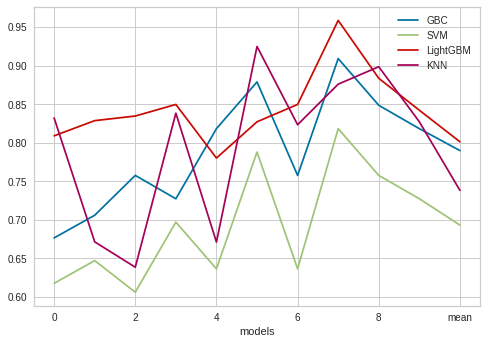

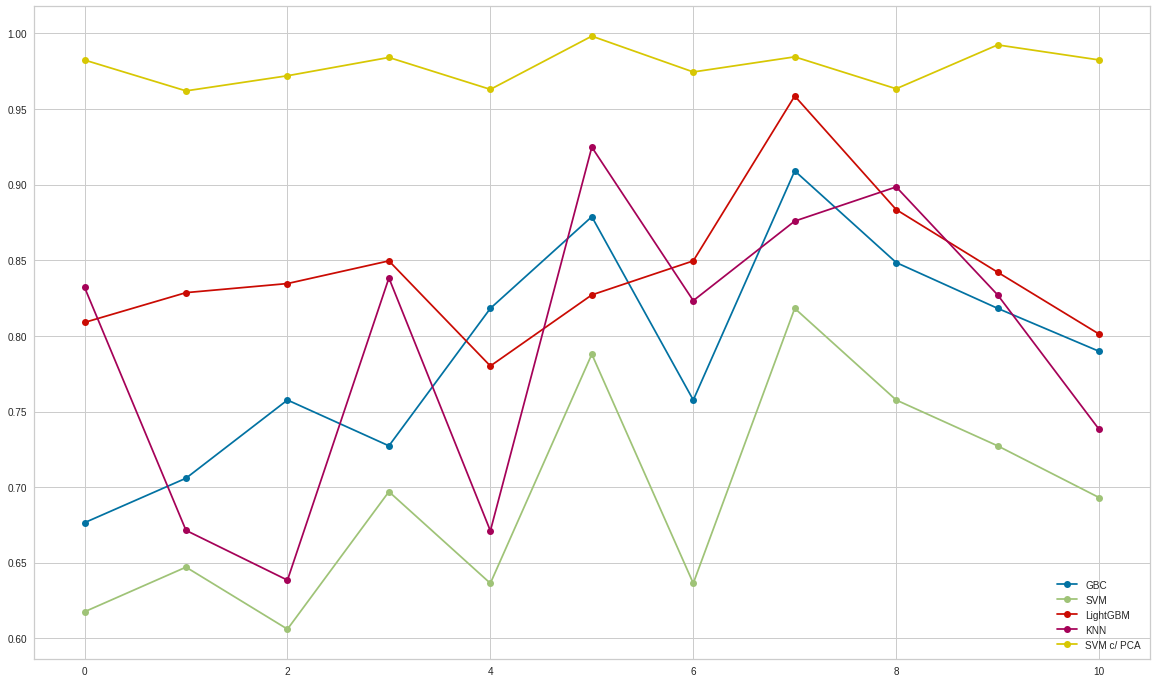

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models = [0,1,2,3,4,5,6,7,8,9,'mean']

graph = pd.DataFrame({ 
  'models': models,
  'GBC': gbc_results, 
  'SVM': svm_results,
  'LightGBM': lightgbm_results,
  'KNN' : knn_results, 
  'SVM c/ PCA': svm_pca_results
})
  
ax = plt.gca()

graph.plot( x = 'models' , y = 'GBC' , ax = ax ), graph.plot( x = 'models', y = 'SVM', ax = ax ), graph.plot( x = 'models', y = 'LightGBM', ax = ax ),graph.plot( x = 'models' , y = 'KNN', ax = ax )
graph.plot(figsize=(20,12), marker = 'o')

# Divisão dos dados

- Separação dos x e y
- Definição dos x_train, x_test, y_train, y_test com as respectivas colunas

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

x = basePyCaret[['Salario Mês', 'Idade', 'Tempo de casa (dias)',
       'Genero_Feminino', 'Genero_Masculino', 'Escolaridade _Ensino Médio',
       'Escolaridade _Ensino Médio Incompleto', 'Escolaridade _Graduação',
       'Escolaridade _Mestrado', 'Escolaridade _Pós Graduação',
       'Escolaridade _Superior incompleto', 'Escolaridade _Técnico',
       'Estado Civil_Casado', 'Estado Civil_Divorciado',
       'Estado Civil_Separado', 'Estado Civil_Solteiro',
       'Estado Civil_União Estável', 'Area_AMS', 'Area_Agencia Digital',
       'Area_Analytics', 'Area_BAC', 'Area_BPM', 'Area_Best Minds',
       'Area_CPG & Retail', 'Area_Commerce', 'Area_Core & Industrias',
       'Area_Diretoria', 'Area_Education', 'Area_Financeiro',
       'Area_Infraestrutura', 'Area_Integration', 'Area_Mkt Cloud', 'Area_PS',
       'Area_People', 'Area_Produtos', 'Area_Vendas', 'Estado_BA', 'Estado_CE',
       'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG', 'Estado_MS',
       'Estado_PA', 'Estado_PB', 'Estado_PE', 'Estado_PR', 'Estado_RJ',
       'Estado_RN', 'Estado_RS', 'Estado_SC', 'Estado_SE', 'Estado_SP',
       'Cargo_Arquiteto', 'Cargo_Arquiteto Sr', 'Cargo_Assistente I',
       'Cargo_Assistente II', 'Cargo_Auxiliar de Limpeza',
       'Cargo_Comercial IS', 'Cargo_Comercial Pl', 'Cargo_Consultor',
       'Cargo_Dev Especialista', 'Cargo_Dev Jr', 'Cargo_Dev Pl',
       'Cargo_Dev Sr', 'Cargo_Diretor', 'Cargo_Educação Pl',
       'Cargo_Estagiaria', 'Cargo_Financeiro Jr',
       'Cargo_Funcional Especialista', 'Cargo_Funcional Jr',
       'Cargo_Funcional Pl', 'Cargo_Funcional Sr', 'Cargo_Gerente',
       'Cargo_Gerente CS Sr', 'Cargo_Gerente PV', 'Cargo_Gerente Sr',
       'Cargo_Gerente Vendas I', 'Cargo_Gerente Vendas II',
       'Cargo_Gerente Vendas III', 'Cargo_Infraestrutura Jr',
       'Cargo_Marketing PL', 'Cargo_Pessoas Pl', 'Cargo_Scrum Master Jr',
       'Cargo_Teste Jr', 'Cargo_Teste Sr', 'Cargo_Trainee - Dev',
       'Cargo_Trainee - Funcional', 'Cargo_Vice Presidente']]

y = basePyCaret["Situacao"]

# Dividindo dados para treino e dados para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size = 0.25, 
                                                   random_state = 1) # qualquer valor como semente do pseudo-random

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(356, 89)
(356,)
(119, 89)
(119,)


### Normalização e Escalonamento dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train[['Salario Mês', 'Idade', 'Tempo de casa (dias)',
       'Genero_Feminino', 'Genero_Masculino', 'Escolaridade _Ensino Médio',
       'Escolaridade _Ensino Médio Incompleto', 'Escolaridade _Graduação',
       'Escolaridade _Mestrado', 'Escolaridade _Pós Graduação',
       'Escolaridade _Superior incompleto', 'Escolaridade _Técnico',
       'Estado Civil_Casado', 'Estado Civil_Divorciado',
       'Estado Civil_Separado', 'Estado Civil_Solteiro',
       'Estado Civil_União Estável', 'Area_AMS', 'Area_Agencia Digital',
       'Area_Analytics', 'Area_BAC', 'Area_BPM', 'Area_Best Minds',
       'Area_CPG & Retail', 'Area_Commerce', 'Area_Core & Industrias',
       'Area_Diretoria', 'Area_Education', 'Area_Financeiro',
       'Area_Infraestrutura', 'Area_Integration', 'Area_Mkt Cloud', 'Area_PS',
       'Area_People', 'Area_Produtos', 'Area_Vendas', 'Estado_BA', 'Estado_CE',
       'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG', 'Estado_MS',
       'Estado_PA', 'Estado_PB', 'Estado_PE', 'Estado_PR', 'Estado_RJ',
       'Estado_RN', 'Estado_RS', 'Estado_SC', 'Estado_SE', 'Estado_SP',
       'Cargo_Arquiteto', 'Cargo_Arquiteto Sr', 'Cargo_Assistente I',
       'Cargo_Assistente II', 'Cargo_Auxiliar de Limpeza',
       'Cargo_Comercial IS', 'Cargo_Comercial Pl', 'Cargo_Consultor',
       'Cargo_Dev Especialista', 'Cargo_Dev Jr', 'Cargo_Dev Pl',
       'Cargo_Dev Sr', 'Cargo_Diretor', 'Cargo_Educação Pl',
       'Cargo_Estagiaria', 'Cargo_Financeiro Jr',
       'Cargo_Funcional Especialista', 'Cargo_Funcional Jr',
       'Cargo_Funcional Pl', 'Cargo_Funcional Sr', 'Cargo_Gerente',
       'Cargo_Gerente CS Sr', 'Cargo_Gerente PV', 'Cargo_Gerente Sr',
       'Cargo_Gerente Vendas I', 'Cargo_Gerente Vendas II',
       'Cargo_Gerente Vendas III', 'Cargo_Infraestrutura Jr',
       'Cargo_Marketing PL', 'Cargo_Pessoas Pl', 'Cargo_Scrum Master Jr',
       'Cargo_Teste Jr', 'Cargo_Teste Sr', 'Cargo_Trainee - Dev',
       'Cargo_Trainee - Funcional', 'Cargo_Vice Presidente'
        ]] = scaler.fit_transform(x_train[['Salario Mês', 'Idade', 'Tempo de casa (dias)',
                                          'Genero_Feminino', 'Genero_Masculino', 'Escolaridade _Ensino Médio',
                                          'Escolaridade _Ensino Médio Incompleto', 'Escolaridade _Graduação',
                                          'Escolaridade _Mestrado', 'Escolaridade _Pós Graduação',
                                          'Escolaridade _Superior incompleto', 'Escolaridade _Técnico',
                                          'Estado Civil_Casado', 'Estado Civil_Divorciado',
                                          'Estado Civil_Separado', 'Estado Civil_Solteiro',
                                          'Estado Civil_União Estável', 'Area_AMS', 'Area_Agencia Digital',
                                          'Area_Analytics', 'Area_BAC', 'Area_BPM', 'Area_Best Minds',
                                          'Area_CPG & Retail', 'Area_Commerce', 'Area_Core & Industrias',
                                          'Area_Diretoria', 'Area_Education', 'Area_Financeiro',
                                          'Area_Infraestrutura', 'Area_Integration', 'Area_Mkt Cloud', 'Area_PS',
                                          'Area_People', 'Area_Produtos', 'Area_Vendas', 'Estado_BA', 'Estado_CE',
                                          'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG', 'Estado_MS',
                                          'Estado_PA', 'Estado_PB', 'Estado_PE', 'Estado_PR', 'Estado_RJ',
                                          'Estado_RN', 'Estado_RS', 'Estado_SC', 'Estado_SE', 'Estado_SP',
                                          'Cargo_Arquiteto', 'Cargo_Arquiteto Sr', 'Cargo_Assistente I',
                                          'Cargo_Assistente II', 'Cargo_Auxiliar de Limpeza',
                                          'Cargo_Comercial IS', 'Cargo_Comercial Pl', 'Cargo_Consultor',
                                          'Cargo_Dev Especialista', 'Cargo_Dev Jr', 'Cargo_Dev Pl',
                                          'Cargo_Dev Sr', 'Cargo_Diretor', 'Cargo_Educação Pl',
                                          'Cargo_Estagiaria', 'Cargo_Financeiro Jr',
                                          'Cargo_Funcional Especialista', 'Cargo_Funcional Jr',
                                          'Cargo_Funcional Pl', 'Cargo_Funcional Sr', 'Cargo_Gerente',
                                          'Cargo_Gerente CS Sr', 'Cargo_Gerente PV', 'Cargo_Gerente Sr',
                                          'Cargo_Gerente Vendas I', 'Cargo_Gerente Vendas II',
                                          'Cargo_Gerente Vendas III', 'Cargo_Infraestrutura Jr',
                                          'Cargo_Marketing PL', 'Cargo_Pessoas Pl', 'Cargo_Scrum Master Jr',
                                          'Cargo_Teste Jr', 'Cargo_Teste Sr', 'Cargo_Trainee - Dev',
                                          'Cargo_Trainee - Funcional', 'Cargo_Vice Presidente'
                                          ]])

x_test[['Salario Mês', 'Idade', 'Tempo de casa (dias)',
       'Genero_Feminino', 'Genero_Masculino', 'Escolaridade _Ensino Médio',
       'Escolaridade _Ensino Médio Incompleto', 'Escolaridade _Graduação',
       'Escolaridade _Mestrado', 'Escolaridade _Pós Graduação',
       'Escolaridade _Superior incompleto', 'Escolaridade _Técnico',
       'Estado Civil_Casado', 'Estado Civil_Divorciado',
       'Estado Civil_Separado', 'Estado Civil_Solteiro',
       'Estado Civil_União Estável', 'Area_AMS', 'Area_Agencia Digital',
       'Area_Analytics', 'Area_BAC', 'Area_BPM', 'Area_Best Minds',
       'Area_CPG & Retail', 'Area_Commerce', 'Area_Core & Industrias',
       'Area_Diretoria', 'Area_Education', 'Area_Financeiro',
       'Area_Infraestrutura', 'Area_Integration', 'Area_Mkt Cloud', 'Area_PS',
       'Area_People', 'Area_Produtos', 'Area_Vendas', 'Estado_BA', 'Estado_CE',
       'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG', 'Estado_MS',
       'Estado_PA', 'Estado_PB', 'Estado_PE', 'Estado_PR', 'Estado_RJ',
       'Estado_RN', 'Estado_RS', 'Estado_SC', 'Estado_SE', 'Estado_SP',
       'Cargo_Arquiteto', 'Cargo_Arquiteto Sr', 'Cargo_Assistente I',
       'Cargo_Assistente II', 'Cargo_Auxiliar de Limpeza',
       'Cargo_Comercial IS', 'Cargo_Comercial Pl', 'Cargo_Consultor',
       'Cargo_Dev Especialista', 'Cargo_Dev Jr', 'Cargo_Dev Pl',
       'Cargo_Dev Sr', 'Cargo_Diretor', 'Cargo_Educação Pl',
       'Cargo_Estagiaria', 'Cargo_Financeiro Jr',
       'Cargo_Funcional Especialista', 'Cargo_Funcional Jr',
       'Cargo_Funcional Pl', 'Cargo_Funcional Sr', 'Cargo_Gerente',
       'Cargo_Gerente CS Sr', 'Cargo_Gerente PV', 'Cargo_Gerente Sr',
       'Cargo_Gerente Vendas I', 'Cargo_Gerente Vendas II',
       'Cargo_Gerente Vendas III', 'Cargo_Infraestrutura Jr',
       'Cargo_Marketing PL', 'Cargo_Pessoas Pl', 'Cargo_Scrum Master Jr',
       'Cargo_Teste Jr', 'Cargo_Teste Sr', 'Cargo_Trainee - Dev',
       'Cargo_Trainee - Funcional', 'Cargo_Vice Presidente'
      ]] = scaler.transform(x_test[['Salario Mês', 'Idade', 'Tempo de casa (dias)',
                                      'Genero_Feminino', 'Genero_Masculino', 'Escolaridade _Ensino Médio',
                                      'Escolaridade _Ensino Médio Incompleto', 'Escolaridade _Graduação',
                                      'Escolaridade _Mestrado', 'Escolaridade _Pós Graduação',
                                      'Escolaridade _Superior incompleto', 'Escolaridade _Técnico',
                                      'Estado Civil_Casado', 'Estado Civil_Divorciado',
                                      'Estado Civil_Separado', 'Estado Civil_Solteiro',
                                      'Estado Civil_União Estável', 'Area_AMS', 'Area_Agencia Digital',
                                      'Area_Analytics', 'Area_BAC', 'Area_BPM', 'Area_Best Minds',
                                      'Area_CPG & Retail', 'Area_Commerce', 'Area_Core & Industrias',
                                      'Area_Diretoria', 'Area_Education', 'Area_Financeiro',
                                      'Area_Infraestrutura', 'Area_Integration', 'Area_Mkt Cloud', 'Area_PS',
                                      'Area_People', 'Area_Produtos', 'Area_Vendas', 'Estado_BA', 'Estado_CE',
                                      'Estado_DF', 'Estado_GO', 'Estado_MA', 'Estado_MG', 'Estado_MS',
                                      'Estado_PA', 'Estado_PB', 'Estado_PE', 'Estado_PR', 'Estado_RJ',
                                      'Estado_RN', 'Estado_RS', 'Estado_SC', 'Estado_SE', 'Estado_SP',
                                      'Cargo_Arquiteto', 'Cargo_Arquiteto Sr', 'Cargo_Assistente I',
                                      'Cargo_Assistente II', 'Cargo_Auxiliar de Limpeza',
                                      'Cargo_Comercial IS', 'Cargo_Comercial Pl', 'Cargo_Consultor',
                                      'Cargo_Dev Especialista', 'Cargo_Dev Jr', 'Cargo_Dev Pl',
                                      'Cargo_Dev Sr', 'Cargo_Diretor', 'Cargo_Educação Pl',
                                      'Cargo_Estagiaria', 'Cargo_Financeiro Jr',
                                      'Cargo_Funcional Especialista', 'Cargo_Funcional Jr',
                                      'Cargo_Funcional Pl', 'Cargo_Funcional Sr', 'Cargo_Gerente',
                                      'Cargo_Gerente CS Sr', 'Cargo_Gerente PV', 'Cargo_Gerente Sr',
                                      'Cargo_Gerente Vendas I', 'Cargo_Gerente Vendas II',
                                      'Cargo_Gerente Vendas III', 'Cargo_Infraestrutura Jr',
                                      'Cargo_Marketing PL', 'Cargo_Pessoas Pl', 'Cargo_Scrum Master Jr',
                                      'Cargo_Teste Jr', 'Cargo_Teste Sr', 'Cargo_Trainee - Dev',
                                      'Cargo_Trainee - Funcional', 'Cargo_Vice Presidente'
                                  ]])

# Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(
  ccp_alpha=0.0, criterion='friedman_mse', init=None,
  learning_rate=0.4, loss='deviance', max_depth=8,
  max_features='sqrt', max_leaf_nodes=None,
  min_impurity_decrease=0.3, min_impurity_split=None,
  min_samples_leaf=3, min_samples_split=5,
  min_weight_fraction_leaf=0.0, n_estimators=180,
  n_iter_no_change=None, presort='deprecated',
  random_state=5910, subsample=0.9, tol=0.0001,
  validation_fraction=0.1, verbose=0,
  warm_start=False
)

clf.fit(x_train, y_train.squeeze())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=180,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5910, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = clf.predict(x_train)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

ValueError: ignored

In [ ]:
print('Acuracidade (treino): ', clf.score( x_train, y_train ))
print('Acuracidade (teste): ', clf.score( x_test, y_test ))

Acuracidade (treino):  0.8932584269662921
Acuracidade (teste):  0.7310924369747899


In [ ]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'red'
matrix = plot_confusion_matrix(clf, x_test, y_test, cmap=plt.cm.Blues)

matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
matriz_corr = basePyCaret.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

In [ ]:
target_corr = matriz_corr.data['Situacao']
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr